In [3]:
import numpy as np
from scipy import stats
from numpy.random import default_rng
rng = default_rng()
import matplotlib.pyplot as plt

# RASP code for linear regression

####  --- Initialize constants ---
LOAD R30, 3          ; R30 = 3


####  --- Load x values ---
LOAD R1, 1           ; x0 = 1

LOAD R2, 2           ; x1 = 2

LOAD R3, 3           ; x2 = 3


####  --- Load y values ---
LOAD R4, 2           ; y0 = 2

LOAD R5, 4           ; y1 = 4

LOAD R6, 5           ; y2 = 5


####  --- Compute x_sum = x0 + x1 + x2 ---
ADD R1, R2, R7       ; R7 = x0 + x1

ADD R7, R3, R7       ; R7 = x0 + x1 + x2


####  --- Compute y_sum = y0 + y1 + y2 ---
ADD R4, R5, R8       ; R8 = y0 + y1

ADD R8, R6, R8       ; R8 = y0 + 
y1 + y2


####  --- x_mean = x_sum // 3 ---
DIV R7, R30, R9      ; R9 = x_mean


####  --- y_mean = y_sum // 3 ---
DIV R8, R30, R10     ; R10 = y_mean


####  --- Compute dx0 = x0 - x_mean ---
SUB R1, R9, R11


####  dy0 = y0 - y_mean
SUB R4, R10, R12


####  term0 = dx0 * dy0
MUL R11, R12, R13


####  dx1 = x1 - x_mean
SUB R2, R9, R14

####  dy1 = y1 - y_mean
SUB R5, R10, R15

####  term1 = dx1 * dy1
MUL R14, R15, R16


####  dx2 = x2 - x_mean
SUB R3, R9, R17

####  dy2 = y2 - y_mean
SUB R6, R10, R18

####  term2 = dx2 * dy2
MUL R17, R18, R19


####  numerator = term0 + term1 + term2
ADD R13, R16, R20

ADD R20, R19, R21     ; R21 = num


####  Compute denominator:
####  sq0 = dx0^2
MUL R11, R11, R11     ; overwrite R11 with dx0^2

####  sq1 = dx1^2
MUL R14, R14, R14     ; overwrite R14 with dx1^2

####  sq2 = dx2^2
MUL R17, R17, R17     ; overwrite R17 with dx2^2


####  den = sq0 + sq1 + sq2
ADD R11, R14, R22

ADD R22, R17, R22     ; R22 = den


####  slope = num // den
DIV R21, R22, R23     ; R23 = slope


####  intercept = y_mean - slope * x_mean
MUL R23, R9, R25      ; slope * x_mean → R25

SUB R10, R25, R24     ; intercept = y_mean - m*x̄


####  HALT
HALT


## Initialize variables

In [4]:
N = 3 # number of data points
r = np.zeros((26,)) # init registers with zeros
pc = 0 # init program counter
halt = False # init halt flag



## Sample data

w: [ 0.40516681  0.71119825 -0.91743498  0.20225504  0.59791909  0.21409763
 -0.61749848  0.85607921 -0.91688389  0.15515955  0.78823378  0.85427803
 -0.99212246 -0.19274055 -0.27991869 -0.09522333  0.73663112  0.85037846
 -0.20475424 -0.51237562 -0.40769152 -0.88927127  0.02804871  0.5451535
 -0.49076403  0.3988297   0.17906529 -0.68904699 -0.63337101 -0.17105378
  0.32761314 -0.04469943 -0.44937201 -0.88163425  0.80906372 -0.85266744
 -0.31003515 -0.21811761  0.57416364  0.35276106 -0.15615573 -0.61698728
 -0.28909577 -0.26239087 -0.90103593  0.0567614   0.24862393 -0.23262659
 -0.0183951  -0.55829962 -0.92849819  0.33811079 -0.52580694 -0.24201141
 -0.63267482 -0.99639417 -0.64316373 -0.62795877  0.8701816  -0.91705238
 -0.08879157 -0.73799696 -0.41852653  0.55459202  0.29554744 -0.58422839
 -0.25678463  0.13057536 -0.51244839  0.91451181  0.96263209 -0.7792327
  0.12106138  0.28811805  0.83843952 -0.2932372   0.90228399 -0.96294039
 -0.61142318 -0.00472353  0.64600899 -0.35603264 -

/var/folders/h_/wy6y3sfs1254rd40kbxmvsw00000gn/T/ipykernel_19554/1127047626.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


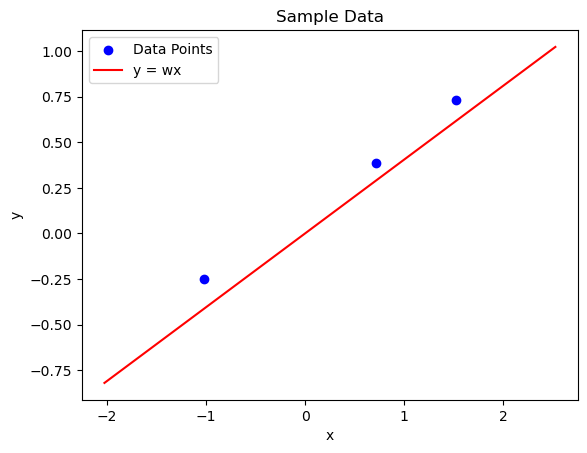

In [5]:
def sample_data(N, rng, trials):
    """
    Sample N data points from a uniform distribution for w and a normal distribution for x.
    Returns the sampled w and the generated x, y pairs.
    """
    w = stats.uniform.rvs(loc=-1, scale=2, size=trials, random_state=rng)
    print("w:", w)
    x = stats.norm.rvs(loc=0, scale=1, size=(N, trials), random_state=rng)
    print("x:", x)
    y = np.zeros((N, trials))
    for i in range(trials):
        y[:, i] = w[i] * x[:, i] + stats.norm.rvs(loc=0, scale=0.1, size=N, random_state=rng)
        print(f"y for trial {i}:", y[:, i])
    print("y:", y)

    return w, x, y

trials = 100
w, x, y = sample_data(N, rng, trials=trials)

#plot the x,y pairs
trial = 0
fig, ax = plt.subplots()
ax.scatter(x[:, trial], y[:, trial], label='Data Points', color='blue')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Sample Data")

#plot a line with slope w and intercept 0
x_line = np.linspace(min(x[:, trial])-1, max(x[:, trial])+1, 100)
y_line = w[trial] * x_line
ax.plot(x_line, y_line, color='red', label='y = wx')
ax.legend()

fig.show()


currently hard-coded for N=3

In [7]:
def run_rasp_scalar_lin_reg(N,x,y,r,pc,halt):
    """
    Run the RASP scalar linear regression program.
    
    Parameters:
    x : np.ndarray
        Input data points.
    y : np.ndarray
        Output data points.
    r : np.ndarray
        Registers.
    pc : int
        Program counter.
    halt : bool
        Halt flag.
    
    Returns:
    r : np.ndarray
        Updated registers.
    pc : int
        Updated program counter.
    halt : bool
        Updated halt flag.
    """
    # Placeholder for the actual RASP program logic
    # This function should implement the RASP instructions for linear regression
    halt = False
    pc = 0
    r[-1] = N  # Store the number of data points in the last register

    for i in range(len(x)):
        pc += 1  # Increment program counter
        r[i] = x[i]
    for i in range(len(y)):
        pc += 1  # Increment program counter
        r[i + N] = y[i]  # Store y values in the next N

    #compute sum of x and y
    pc += 1  # Increment program counter
    r[N + N] = r[0] + r[1]  # Store sum of x1 and x2 in register N+N

    pc += 1  # Increment program counter
    r[N + N] += r[2]  # Add x3 to the sum

    pc += 1  # Increment program counter
    r[N + N + 1] = r[N] + r[N + 1]  # Store sum of y1 and y2 in register N+N+1
    pc += 1  # Increment program counter
    r[N + N + 1] += r[N + 2]  # Add y3 to the sum

    # Compute the mean of x and y
    pc += 1  # Increment program counter
    r[N + N + 2] = r[N + N] / r[-1]  # Mean of x
    pc += 1  # Increment program counter
    r[N + N + 3] = r[N + N + 1] / r[-1]  # Mean of y

    #compute centered x1 and y1
    pc += 1  # Increment program counter
    r[N + N + 4] = r[0] - r[N + N + 2]  # Center x1

    pc += 1  # Increment program counter
    r[N + N + 5] = r[N] - r[N + N + 3]  # Center y1

    #compute term1
    pc += 1  # Increment program counter
    r[N + N + 6] = r[N + N + 4] * r[N + N + 5]  # Square of centered x1

    #compute centered x2 and y2
    pc += 1  # Increment program counter
    r[N + N + 7] = r[1] - r[N + N + 2]  # Center x2
    pc += 1  # Increment program counter
    r[N + N + 8] = r[N + 1] - r[N + N + 3]  # Center y2

    #compute term2
    pc += 1  # Increment program counter
    r[N + N + 9] = r[N + N + 7] * r[N + N + 8]  # Square of centered x2

    #compute centered x3 and y3
    pc += 1  # Increment program counter
    r[N + N + 10] = r[2] - r[N + N + 2]  # Center x3
    pc += 1  # Increment program counter
    r[N + N + 11] = r[N + 2] - r[N + N + 3]  # Center y3

    #compute term3
    pc += 1  # Increment program counter
    r[N + N + 12] = r[N + N + 10] * r[N + N + 11]  # Square of centered x3

    # Sum the terms
    pc += 1  # Increment program counter
    r[N + N + 13] = r[N + N + 6] + r[N + N + 9] # Sum of term1 and term2
    pc += 1  # Increment program counter
    r[N + N + 13] += r[N + N + 12] #sum of all terms (NUMERATOR)

    # compute the denominator by squaring the centered x values
    pc += 1  # Increment program counter
    r[N + N + 4] = r[N + N + 4] * r[N + N + 4]  # Square of centered x1
    pc += 1  # Increment program counter
    r[N + N + 7] = r[N + N + 7] * r[N + N + 7]  # Square of centered x2
    pc += 1  # Increment program counter
    r[N + N + 10] = r[N + N + 10] * r[N + N + 10]  # Square of centered x3

    # Sum the squared terms
    pc += 1  # Increment program counter
    r[N + N + 14] = r[N + N + 4] + r[N + N + 7]  # Sum of squared term1 and term2
    pc += 1  # Increment program counter
    r[N + N + 14] += r[N + N + 10]  # Sum of all squared terms (DENOMINATOR)

    # Compute the slope w
    pc += 1  # Increment program counter
    r[N + N + 15] = r[N + N + 13] / r[N + N + 14]  # w = sum of products / sum of squares (SLOPE)

    #Compute the intercept
    pc += 1  # Increment program counter
    r[N + N + 16] = r[N + N + 15] * r[N + N + 2]  # w * mean of x
    pc += 1  # Increment program counter
    r[N + N + 17] = r[N + N + 3] - r[N + N + 16]  # mean of y - w * mean of x (INTERCEPT)

    halt = True  # Set halt flag to True after computation

    slope = r[N + N + 15]
    intercept = r[N + N + 17]




    return r, pc, halt, slope, intercept


In [10]:
slopes = np.zeros(trials)
intercepts = np.zeros(trials)
pcs = np.zeros(trials)
halts = np.zeros(trials, dtype=bool)
rs = np.zeros((26, trials))
for trial in range(trials):
    r, pc, halt, slope, intercept = run_rasp_scalar_lin_reg(N, x[:, trial], y[:, trial], r, pc, halt)
    slopes[trial] = slope
    intercepts[trial] = intercept
    pcs[trial] = pc
    halts[trial] = halt
    rs[:, trial] = r

In [12]:
# print("Slopes:", slopes)
# print("Intercepts:", intercepts)
# print("Program counters:", pcs)
# print("Halts:", halts)
print("Registers:", rs)

Registers: [[ 1.52280071  0.84913995 -0.72339695 ... -0.10928045  0.05497004
  -1.2055145 ]
 [ 0.71632538  3.73209653  0.32642348 ...  0.73200091 -0.84016186
   1.50178876]
 [-1.02281297 -0.88737435  0.44752968 ...  0.10289959  2.00744255
  -1.3584491 ]
 ...
 [ 0.1339      0.03957118 -0.08015393 ...  0.11795496  0.0425461
   0.0136605 ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 3.          3.          3.         ...  3.          3.
   3.        ]]


/var/folders/h_/wy6y3sfs1254rd40kbxmvsw00000gn/T/ipykernel_19554/2880315450.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/h_/wy6y3sfs1254rd40kbxmvsw00000gn/T/ipykernel_19554/2880315450.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


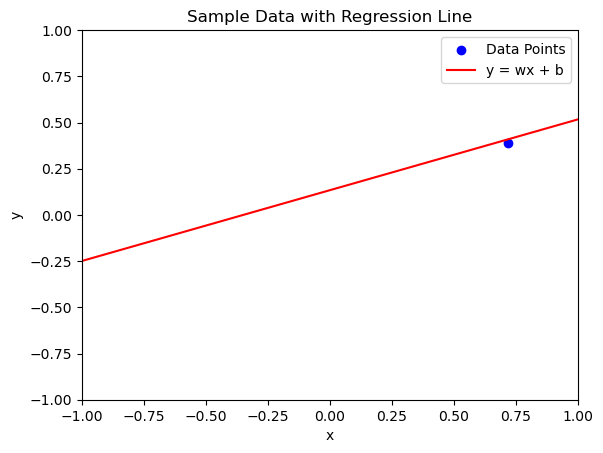

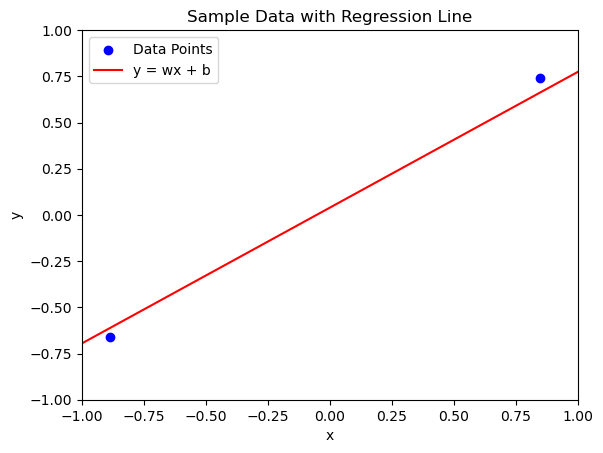

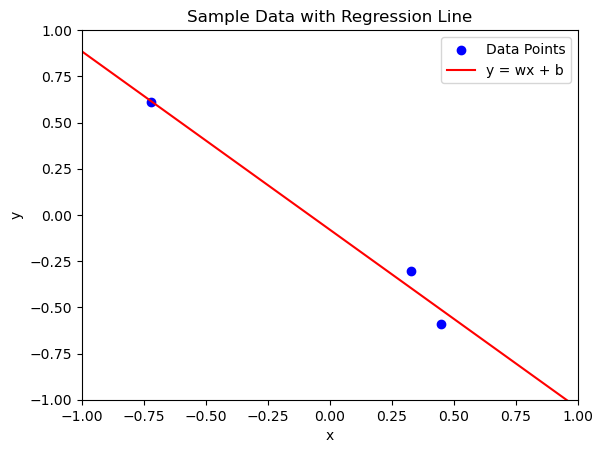

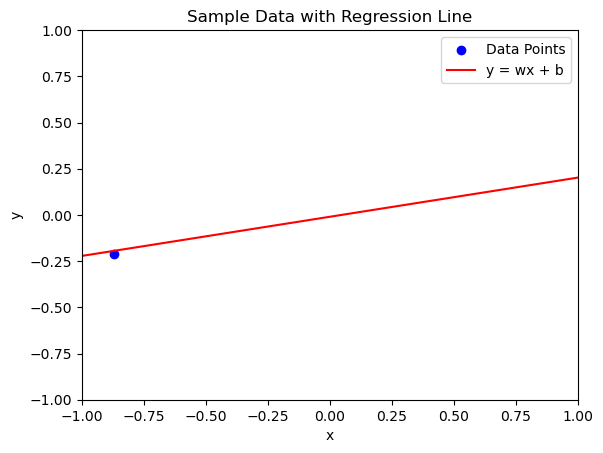

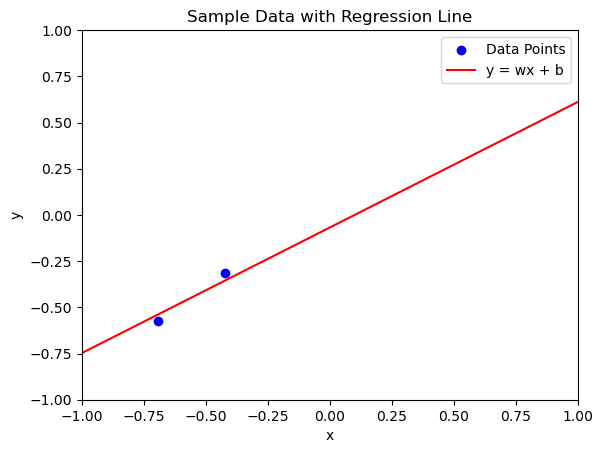

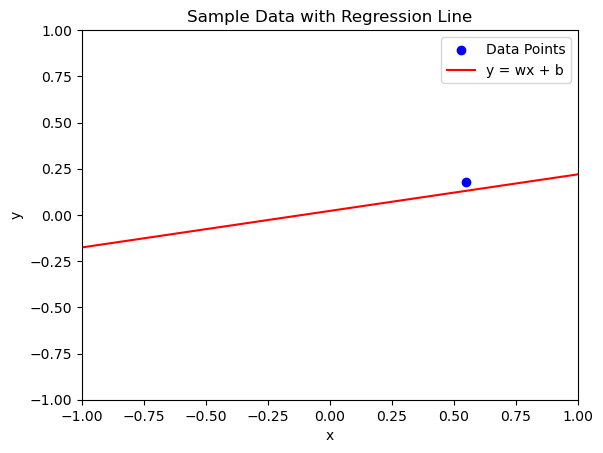

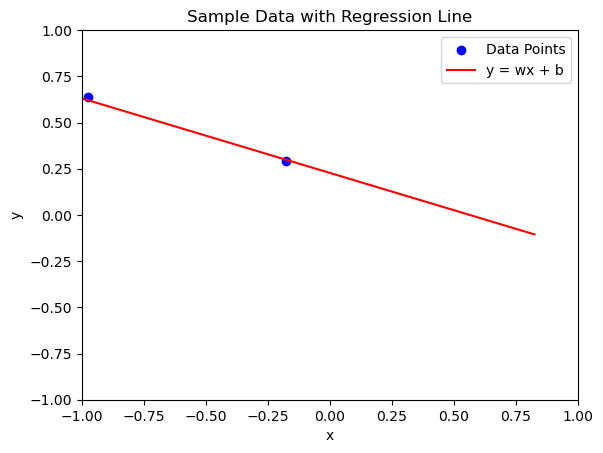

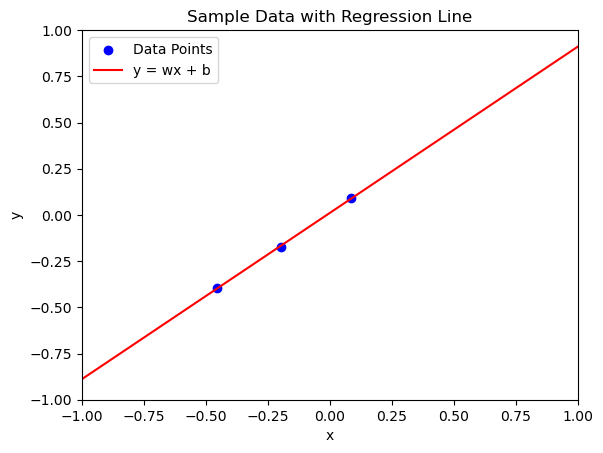

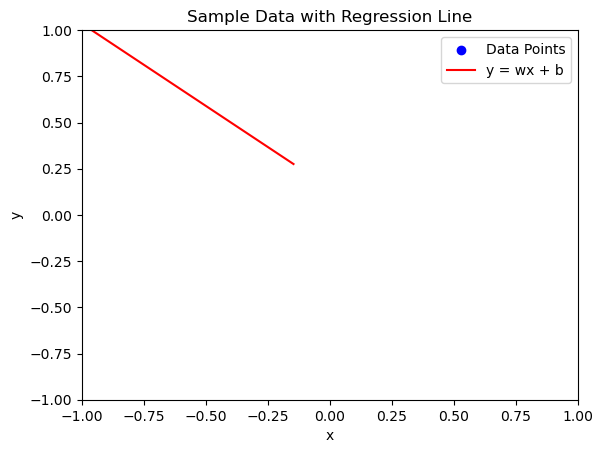

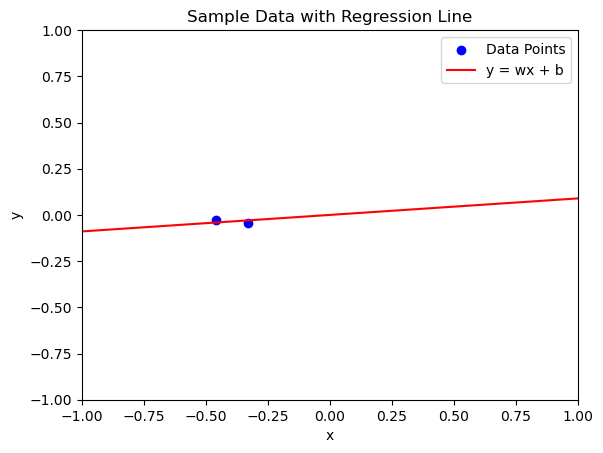

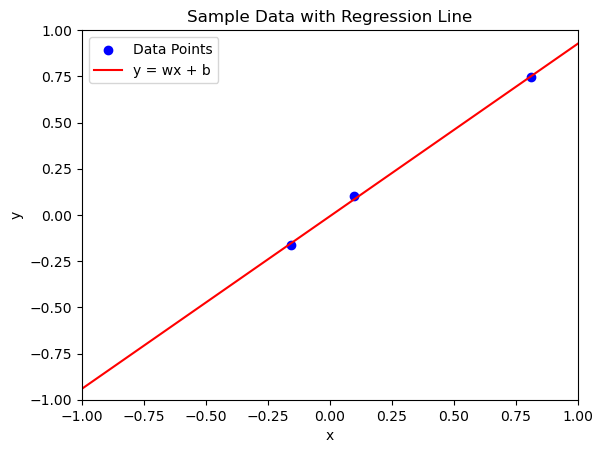

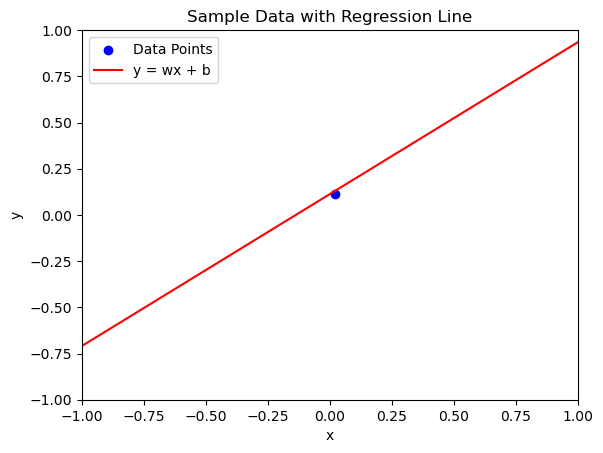

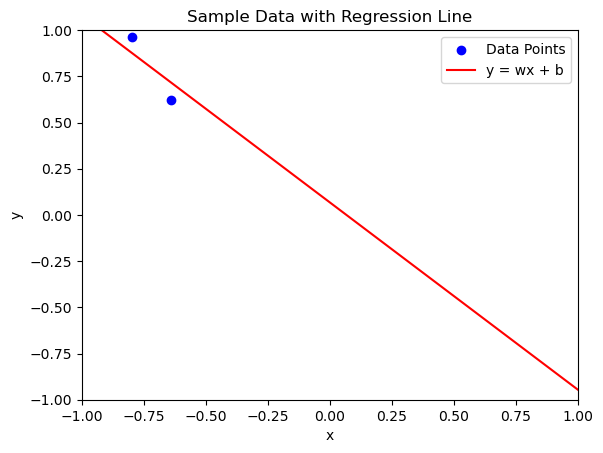

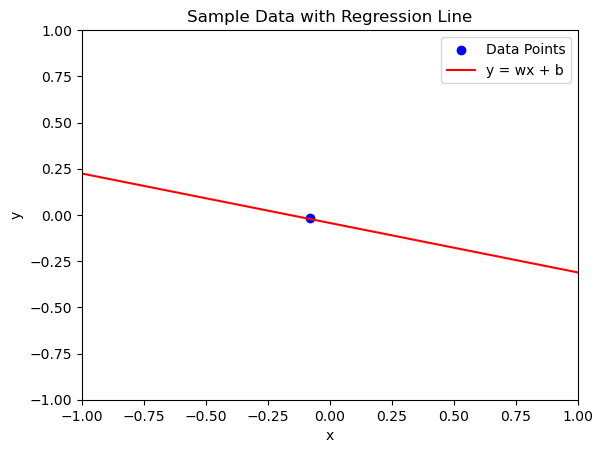

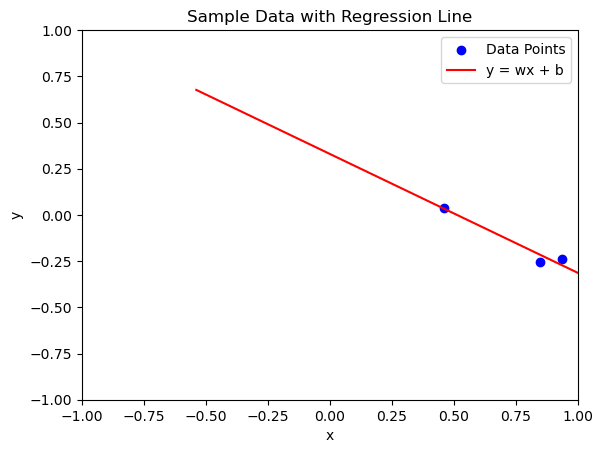

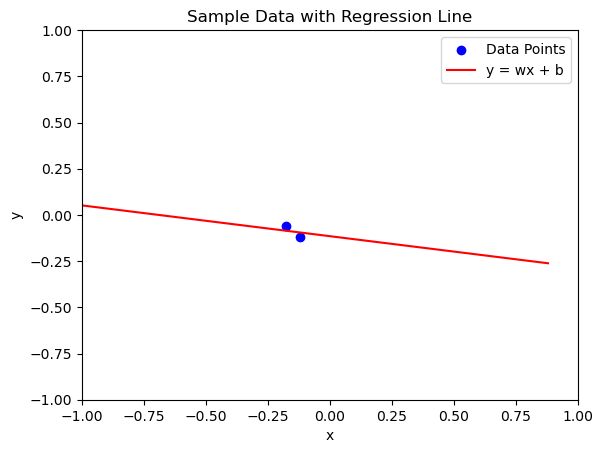

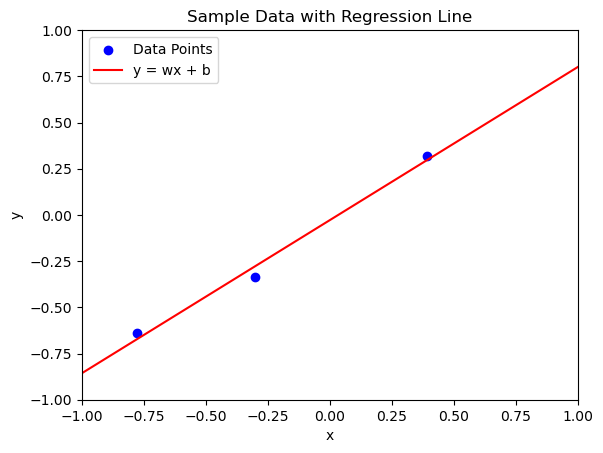

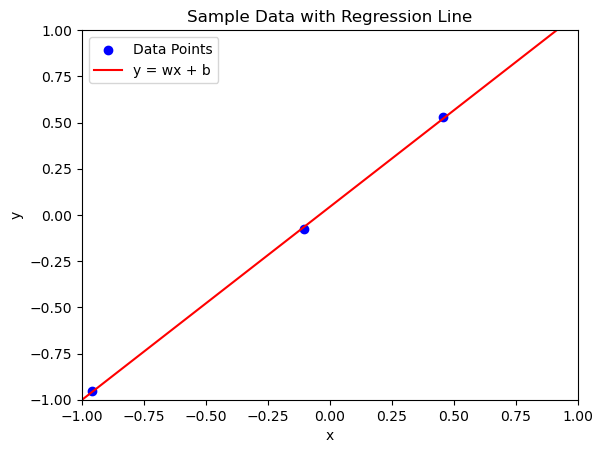

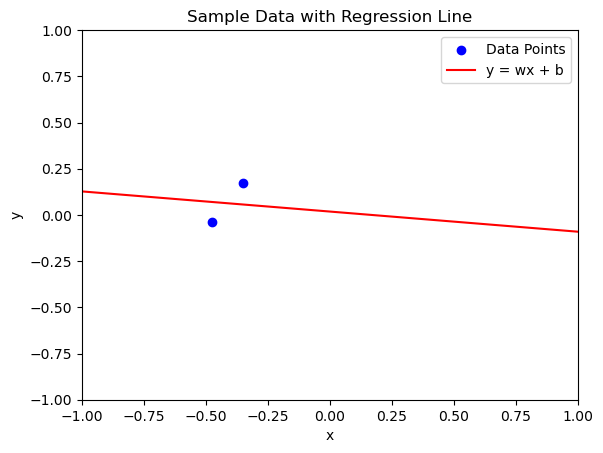

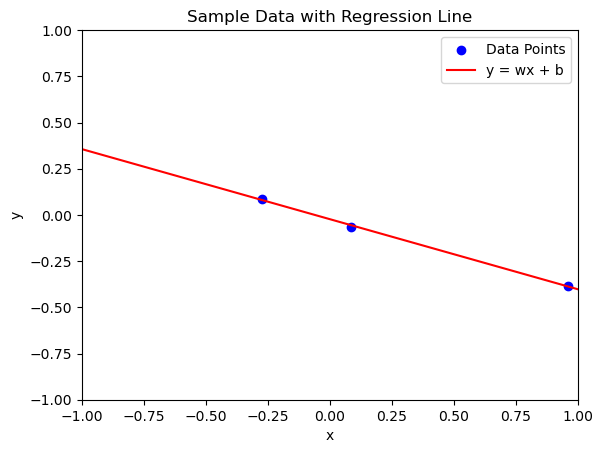

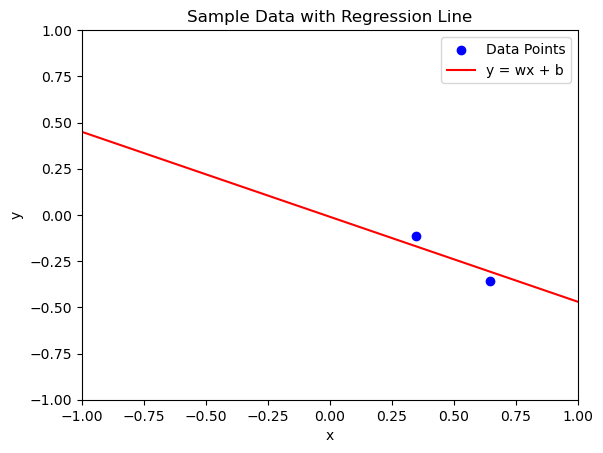

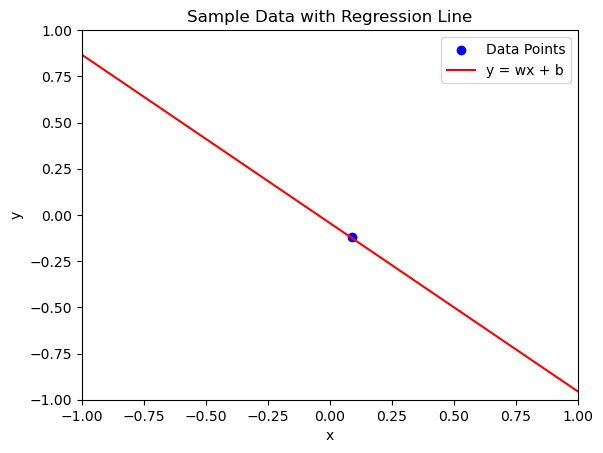

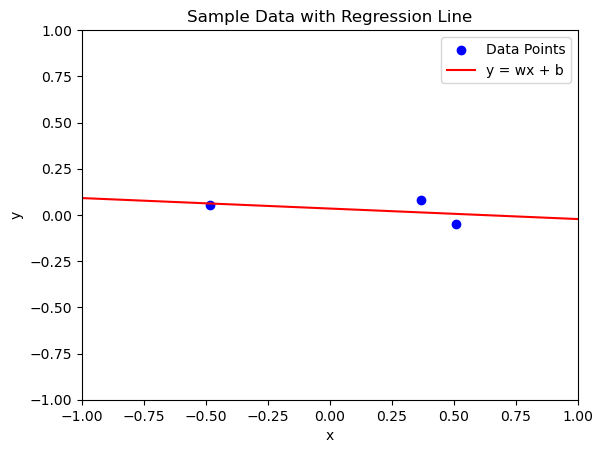

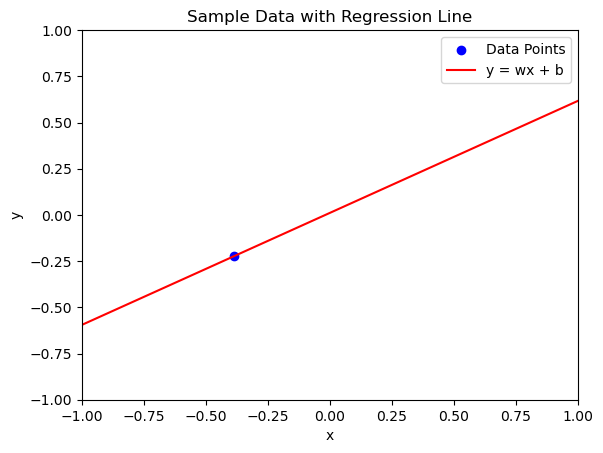

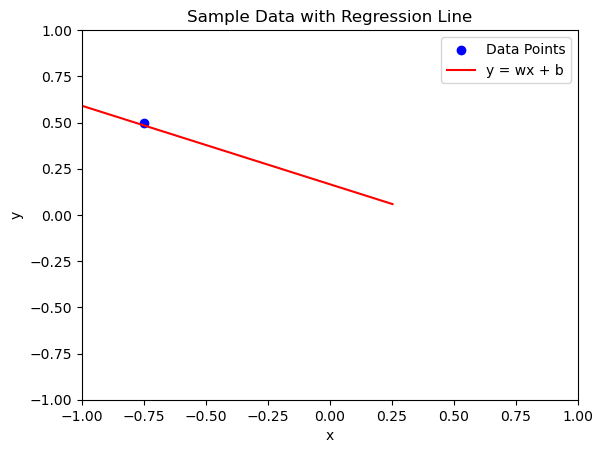

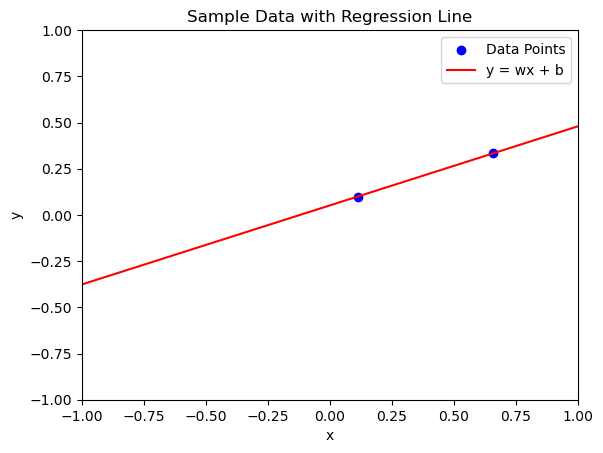

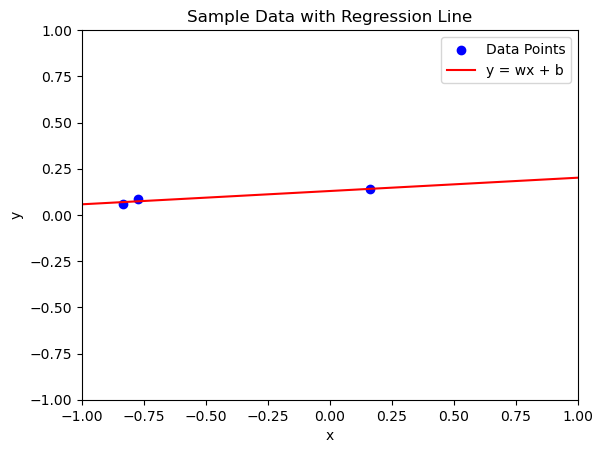

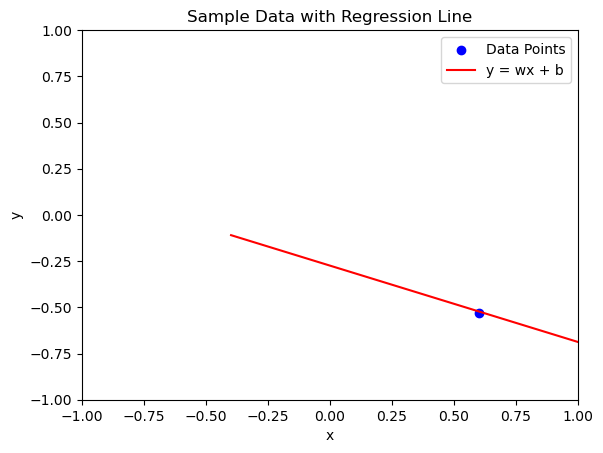

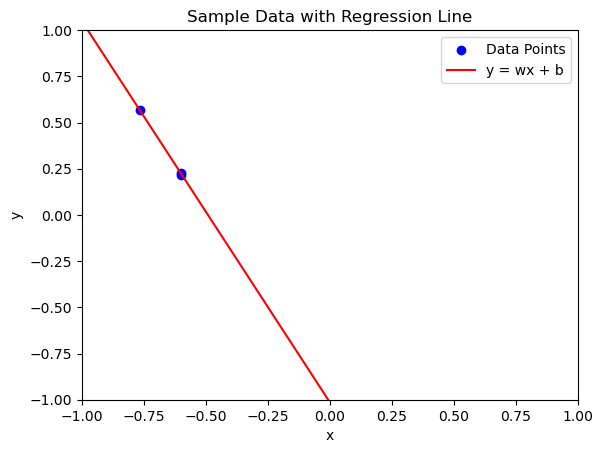

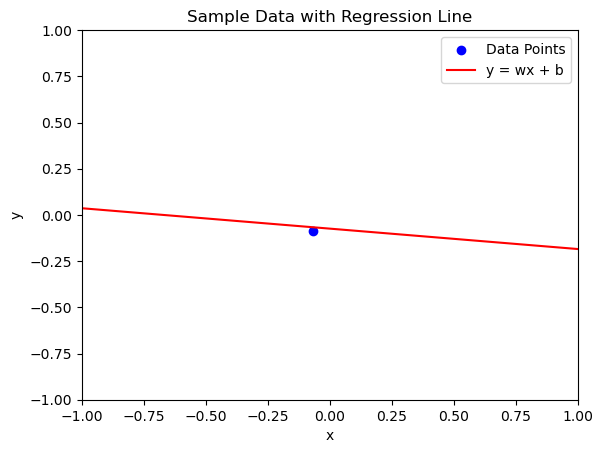

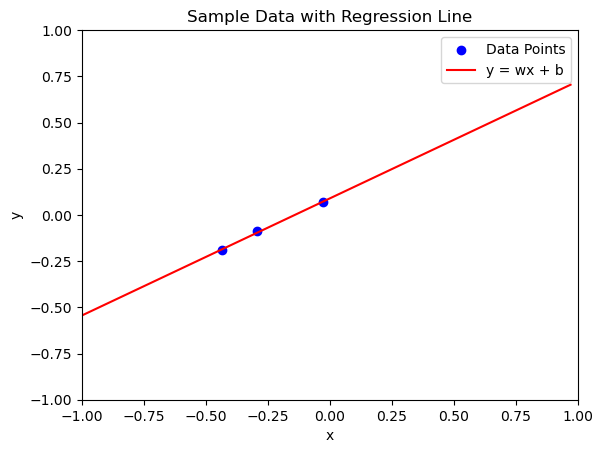

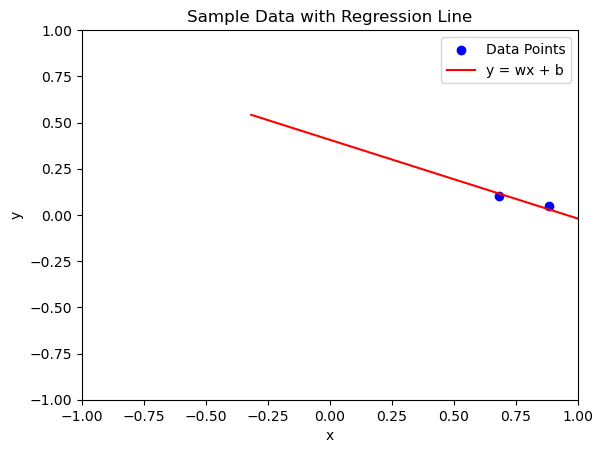

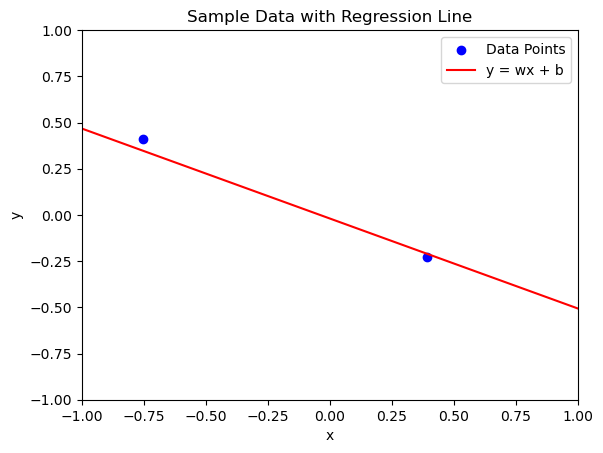

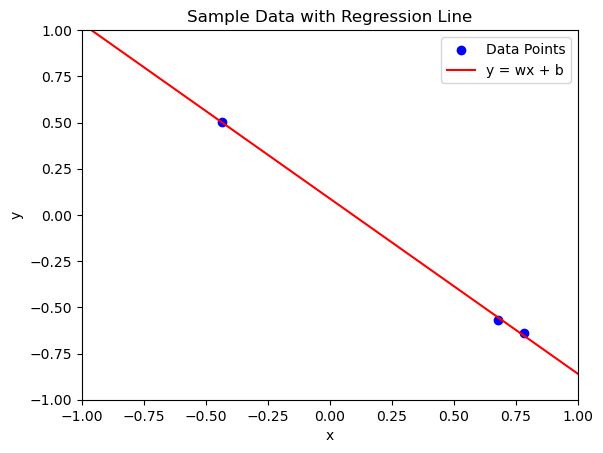

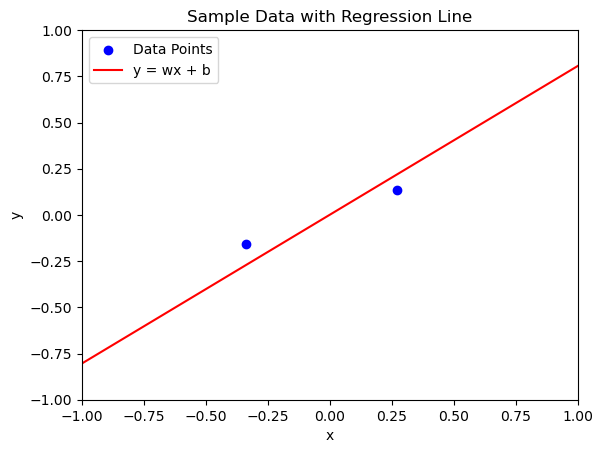

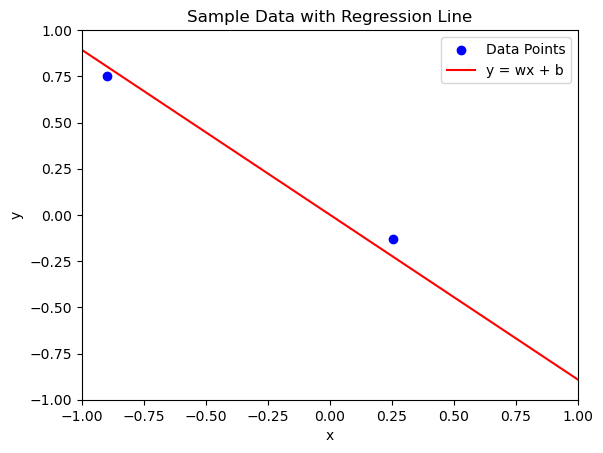

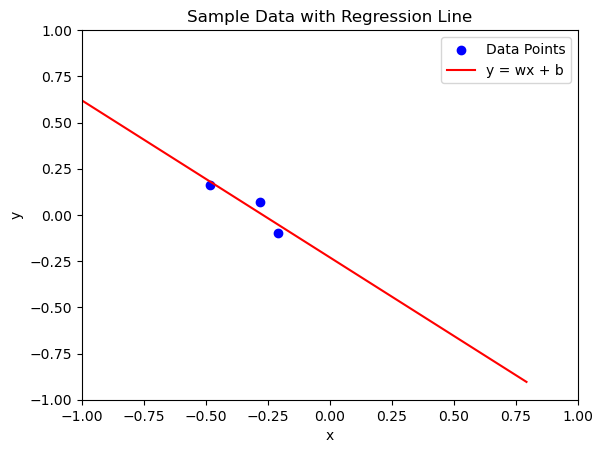

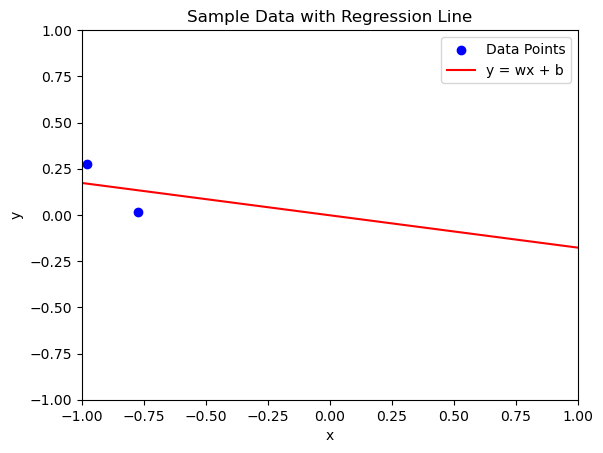

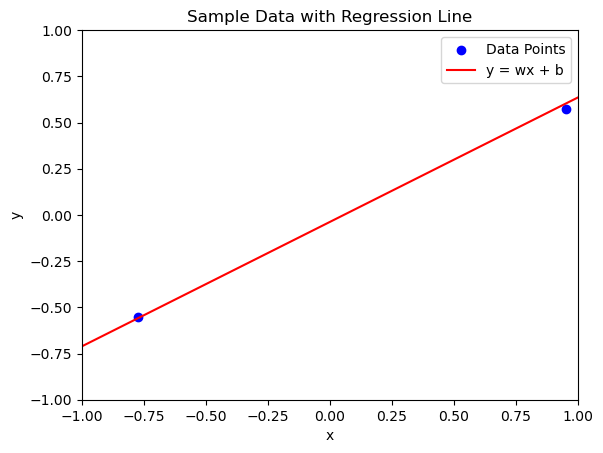

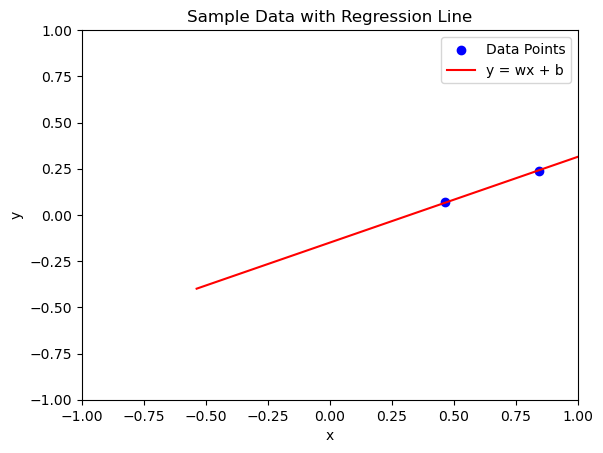

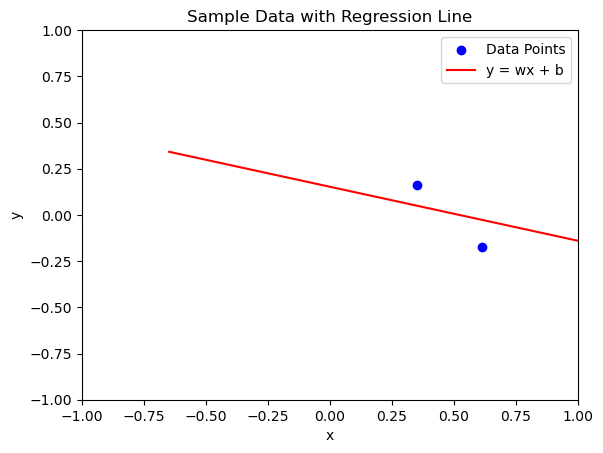

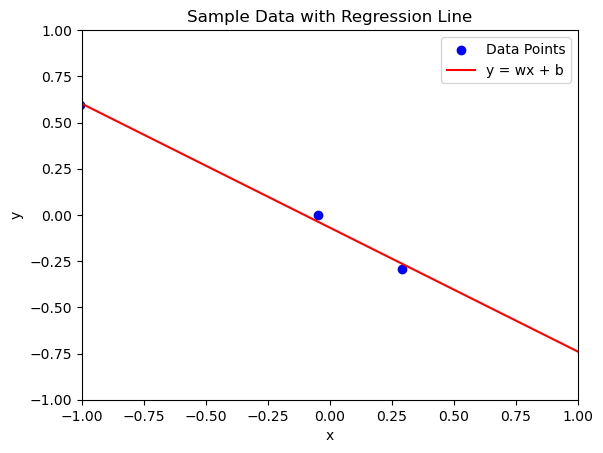

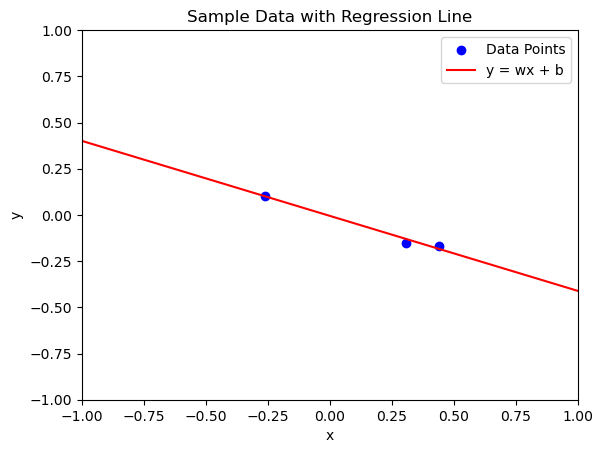

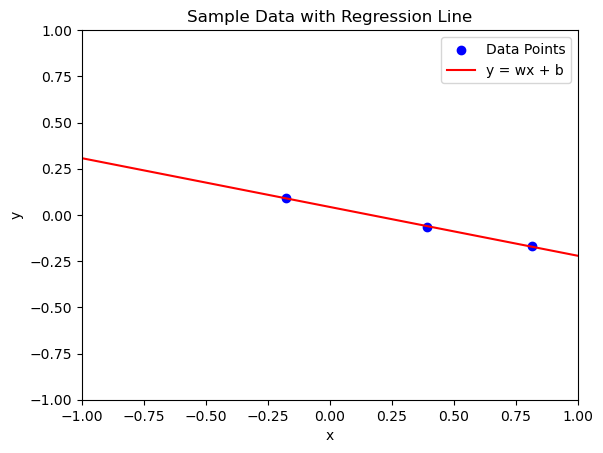

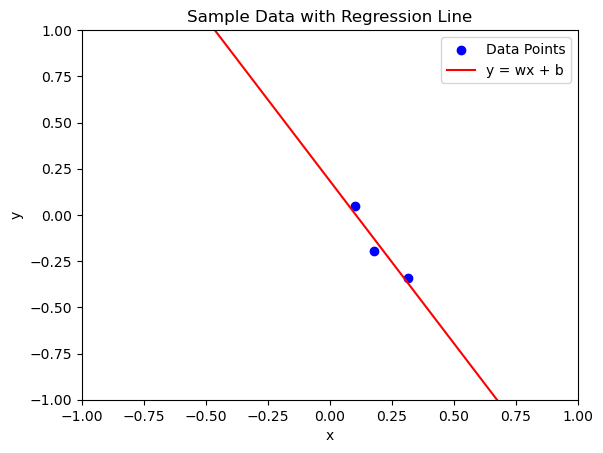

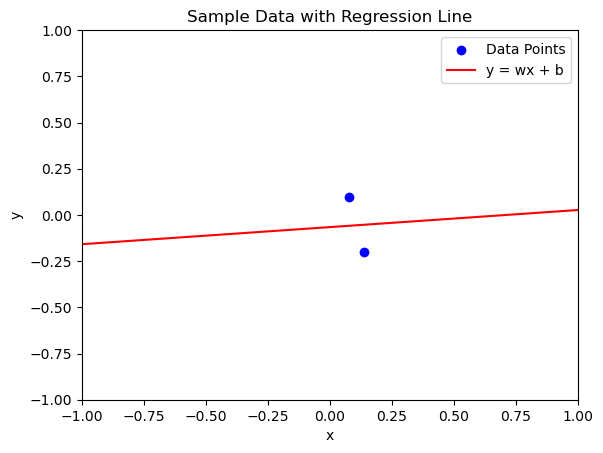

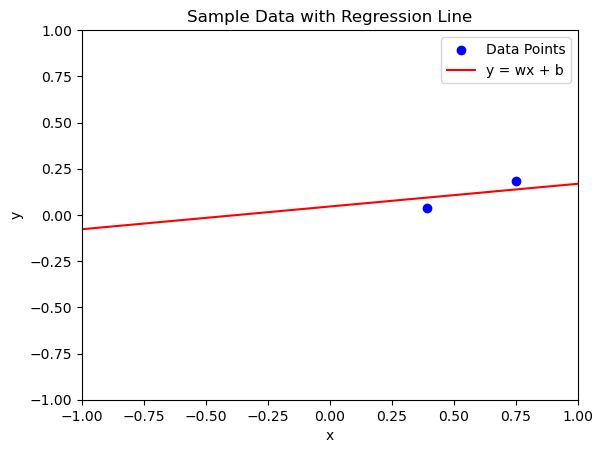

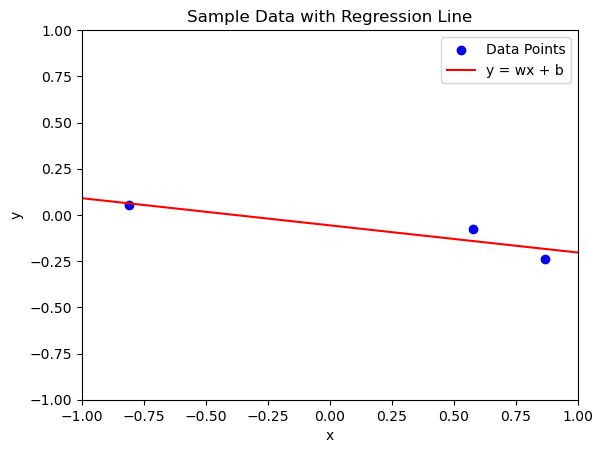

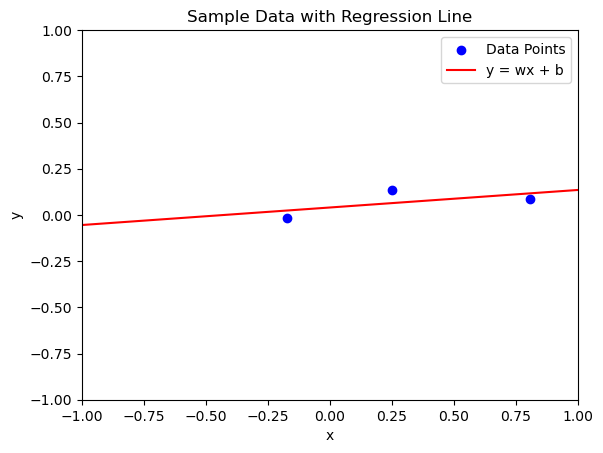

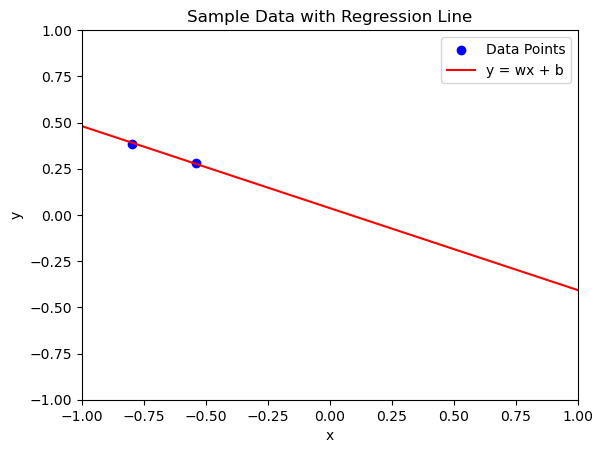

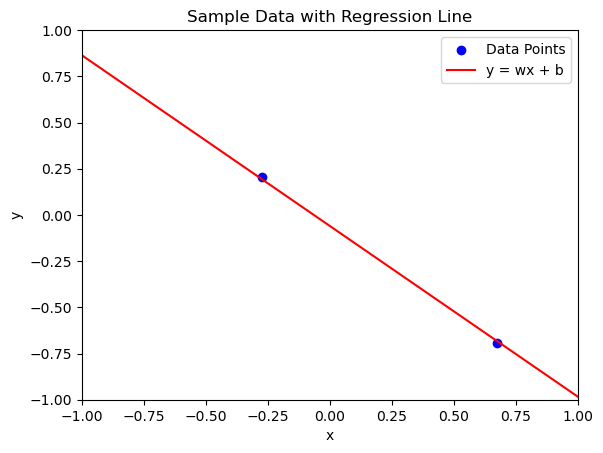

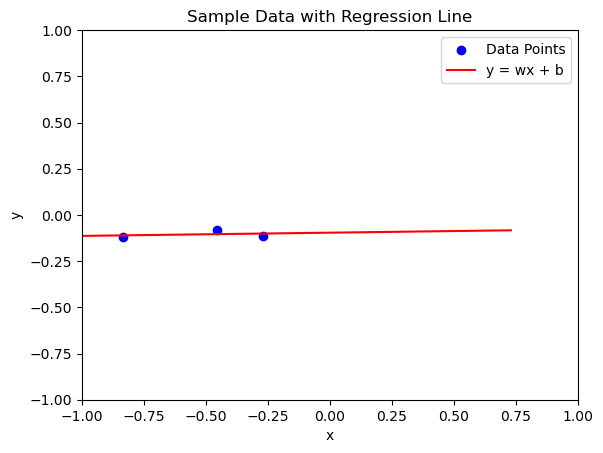

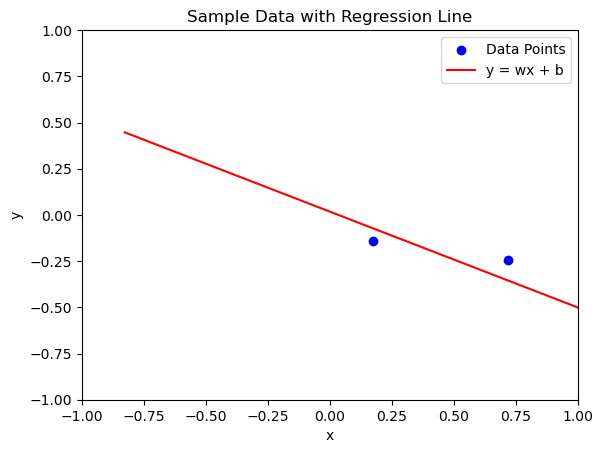

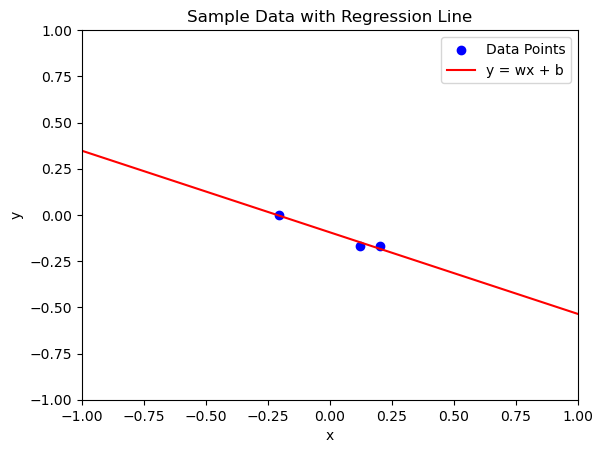

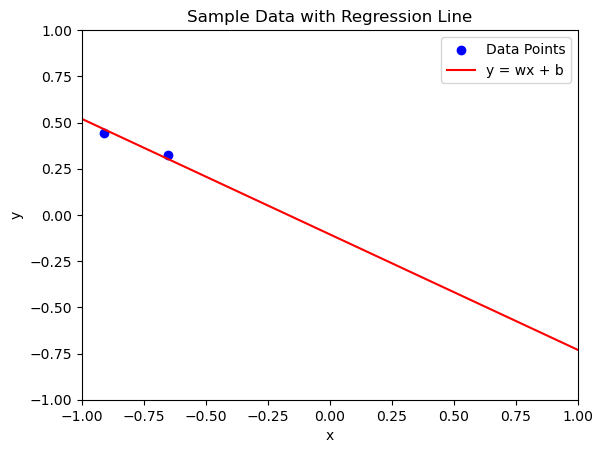

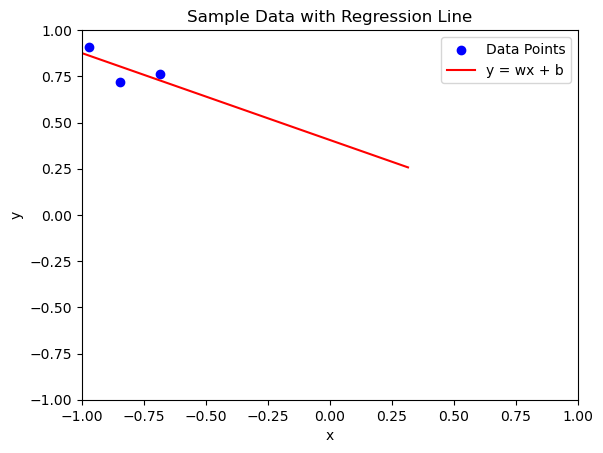

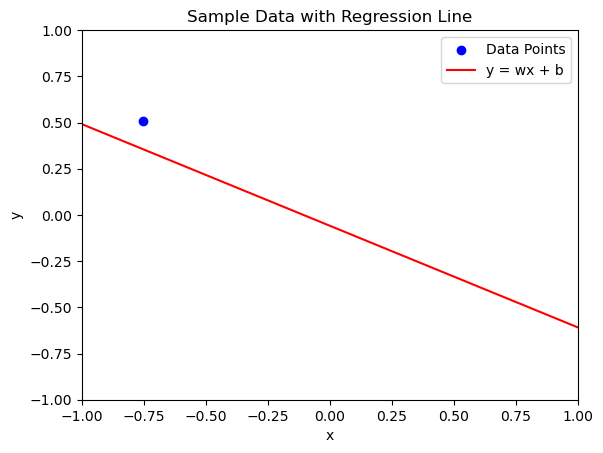

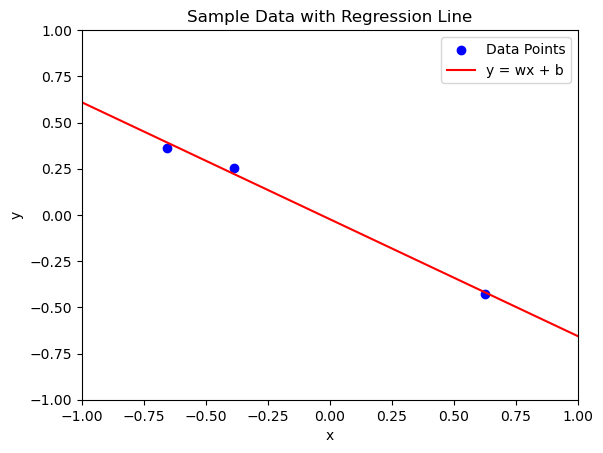

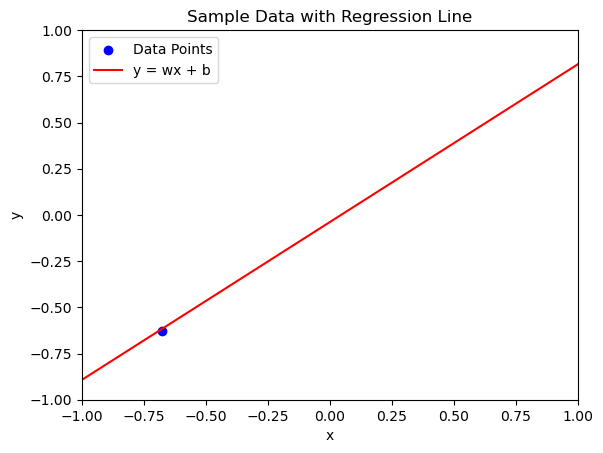

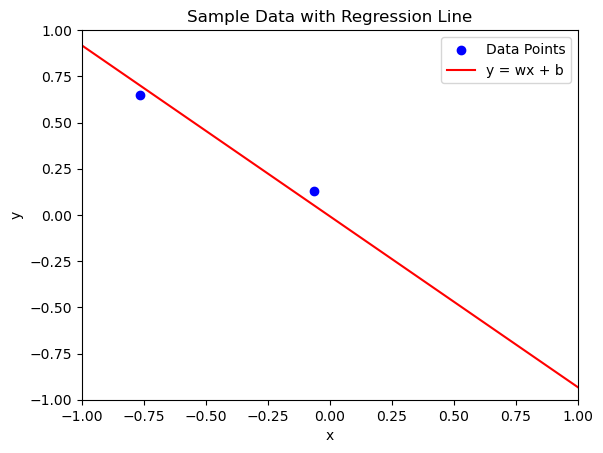

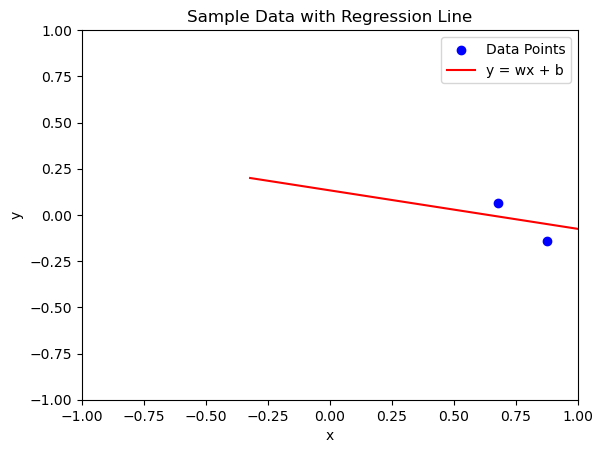

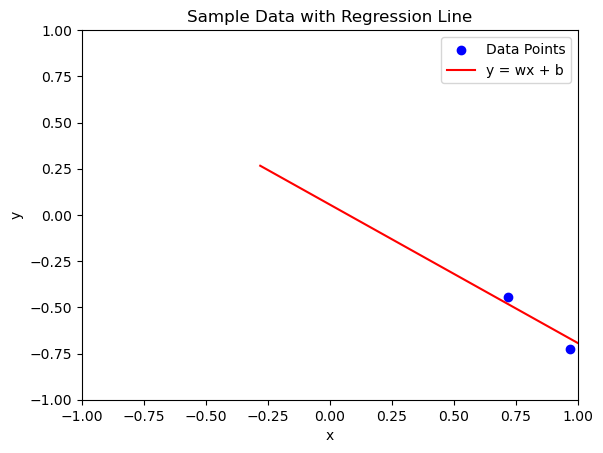

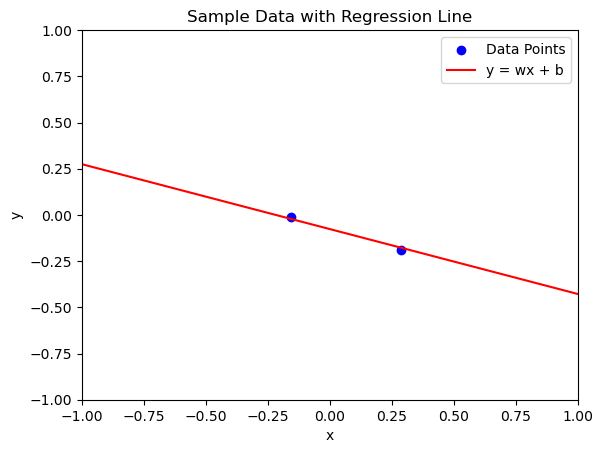

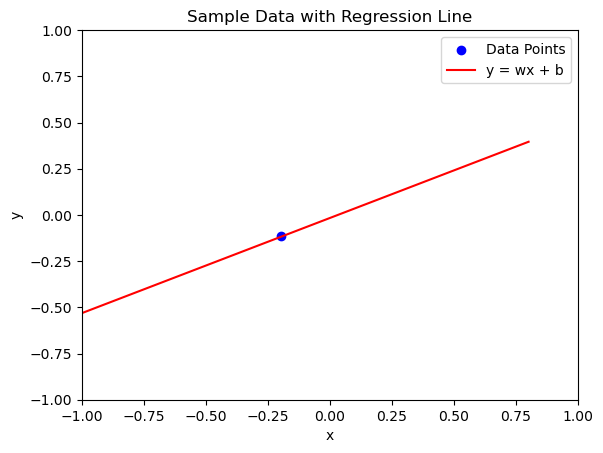

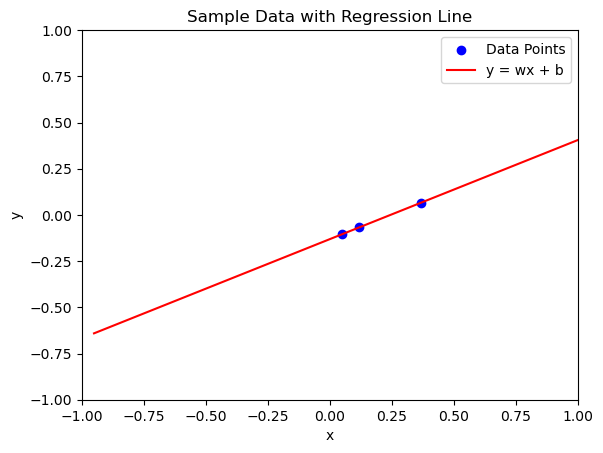

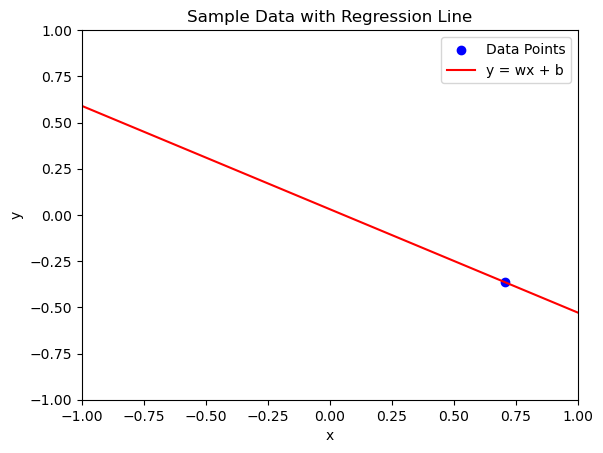

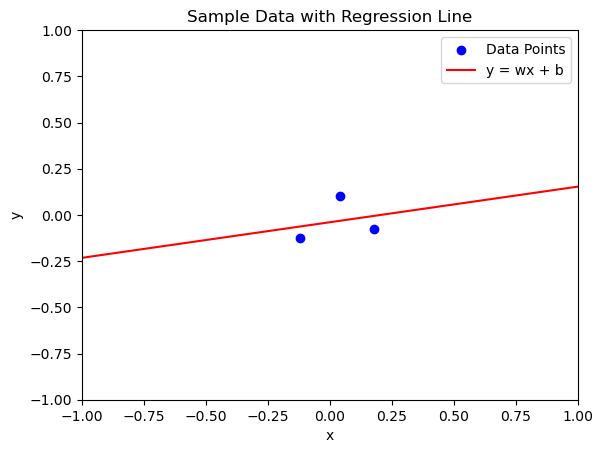

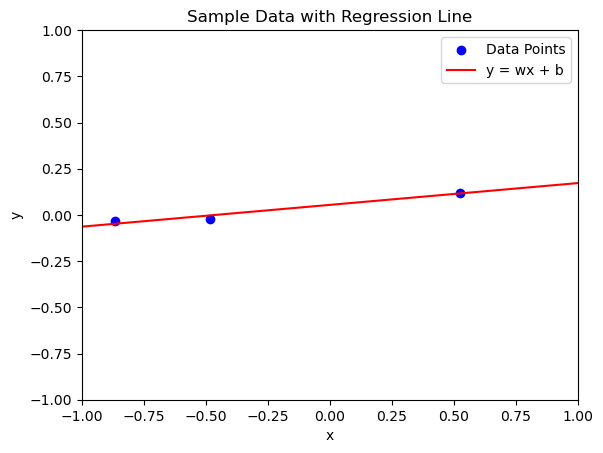

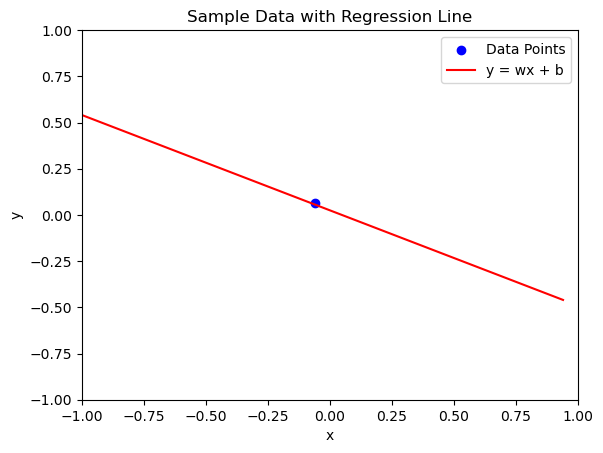

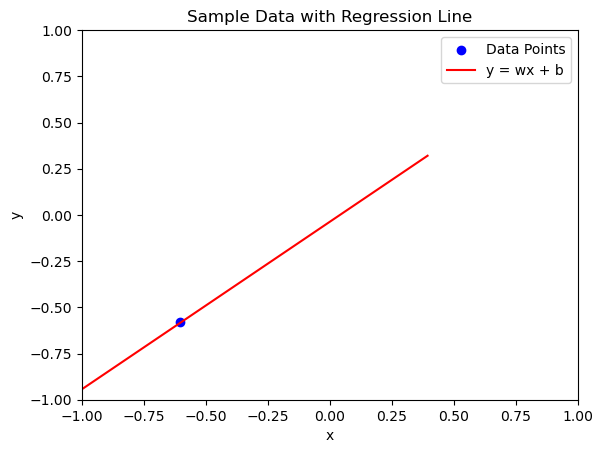

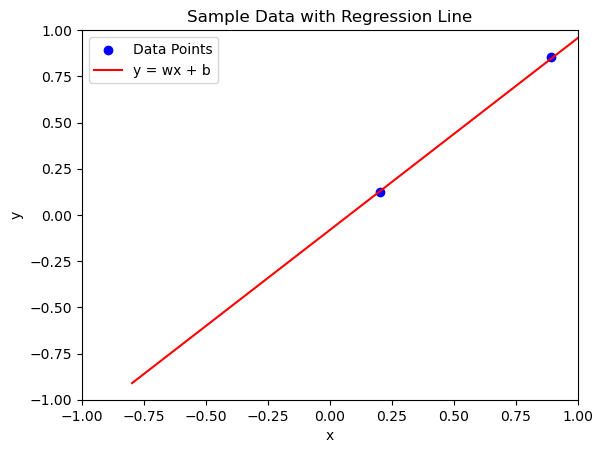

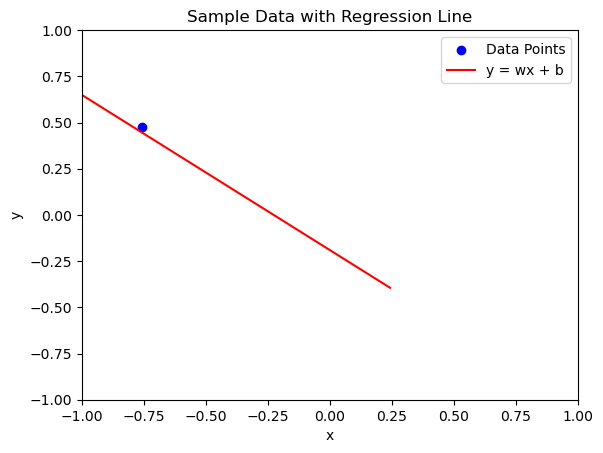

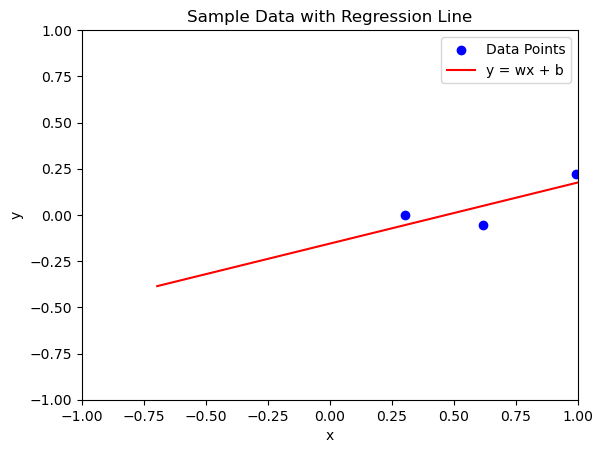

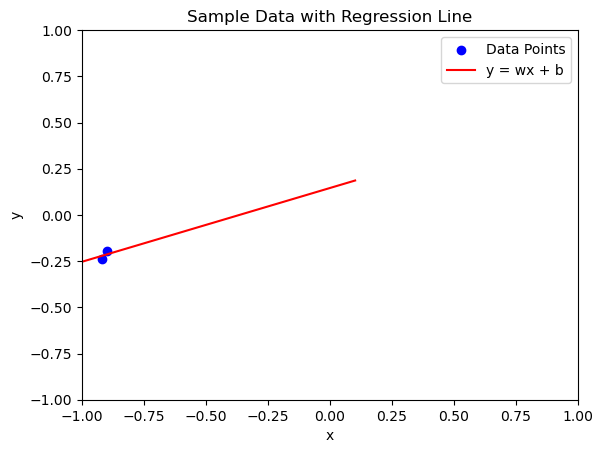

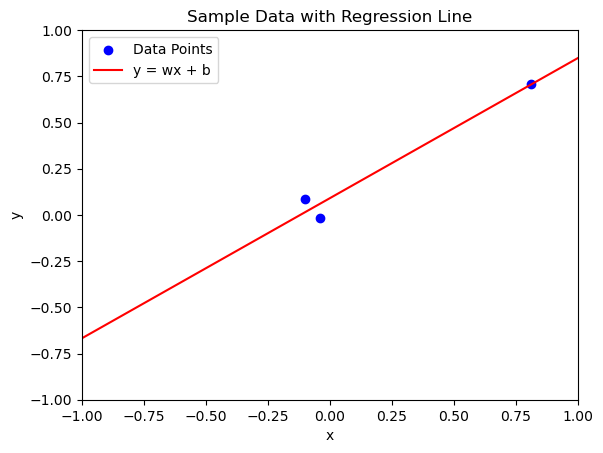

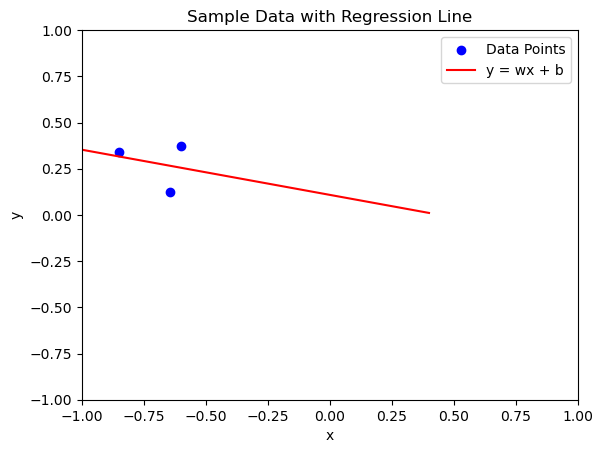

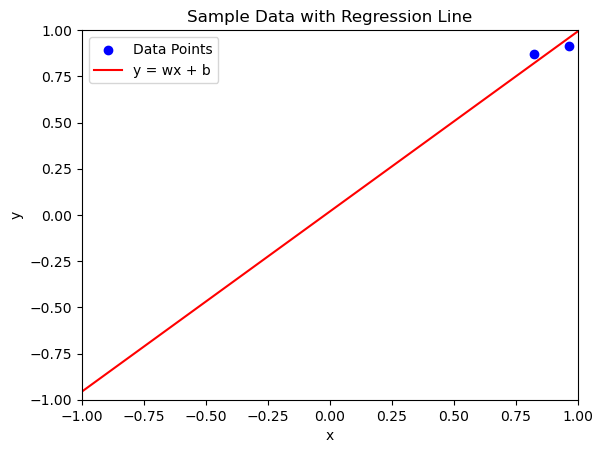

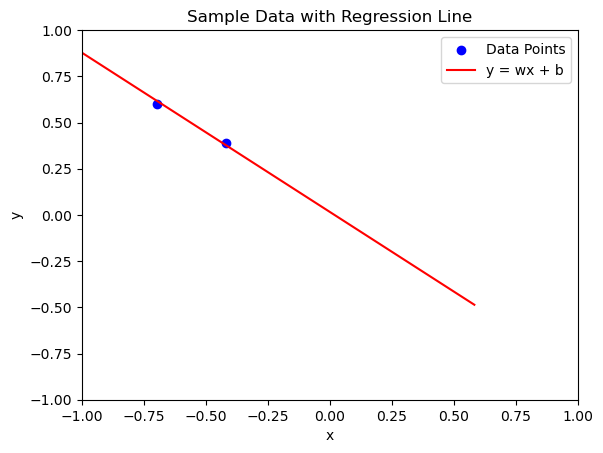

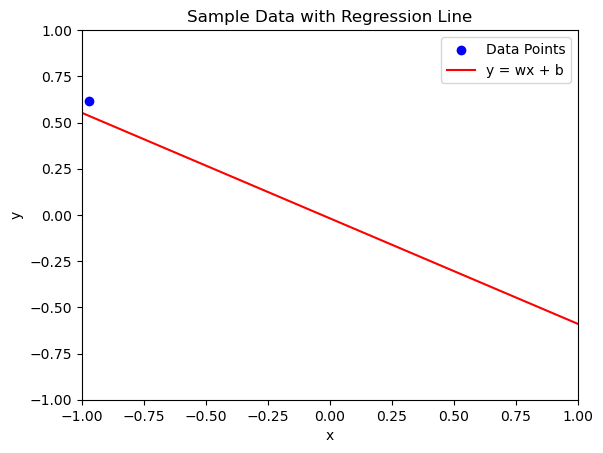

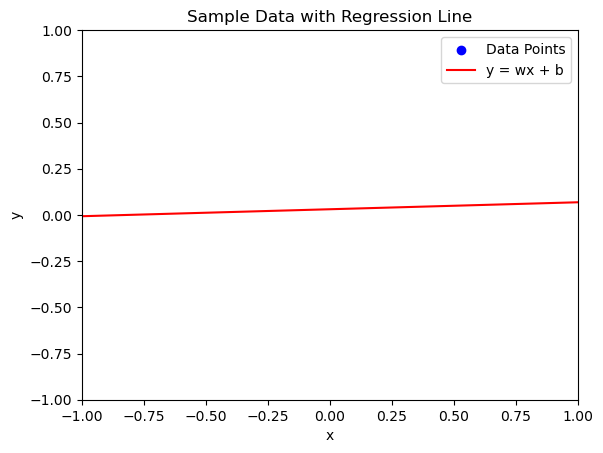

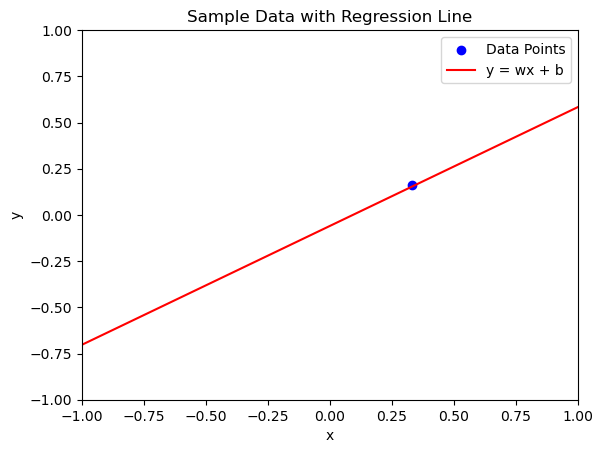

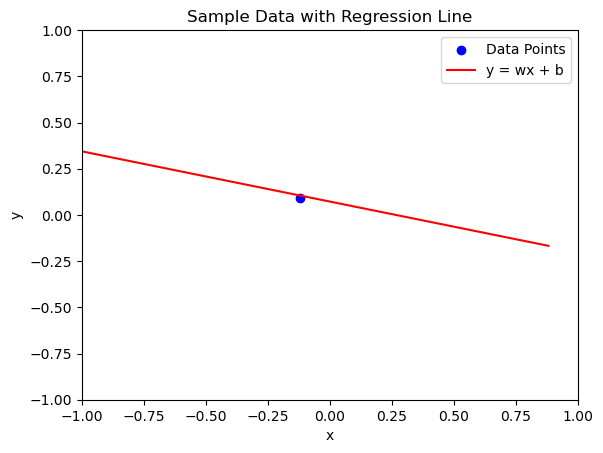

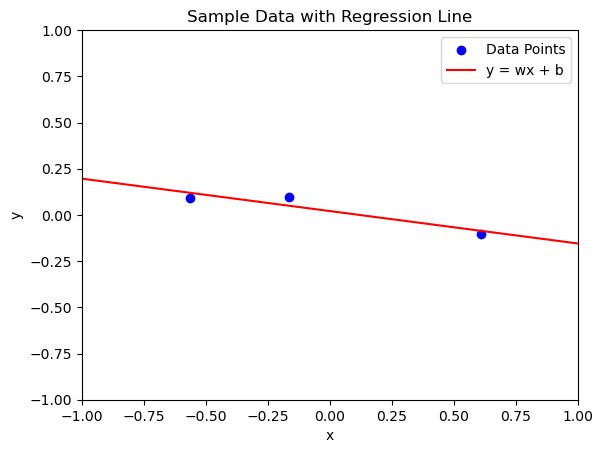

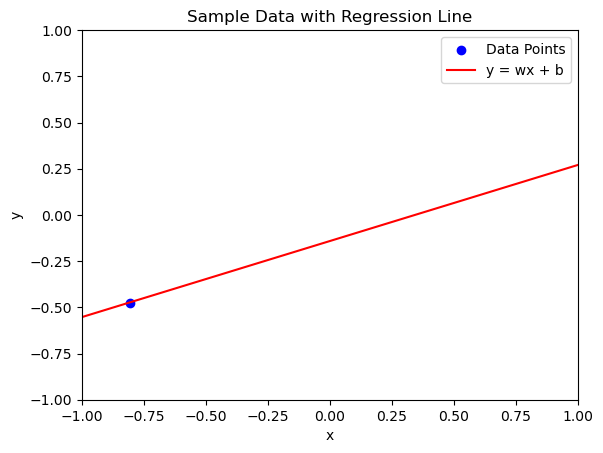

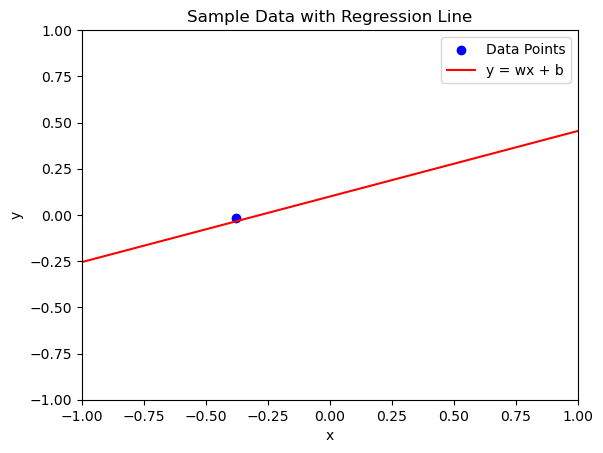

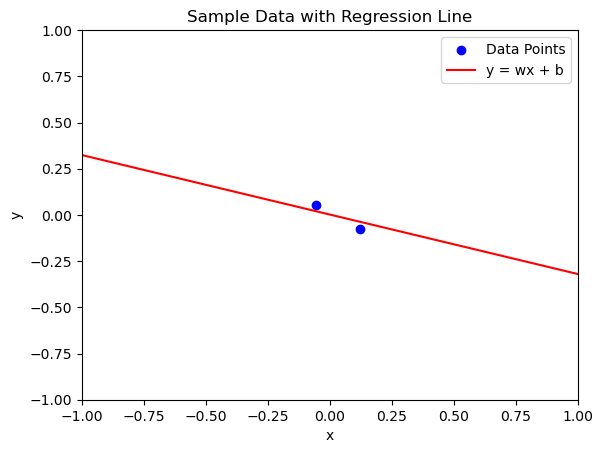

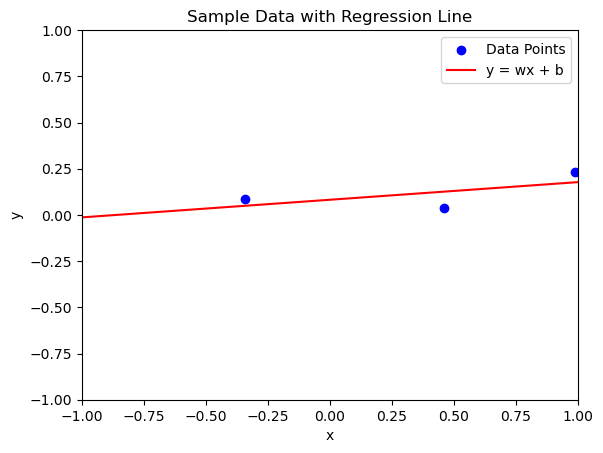

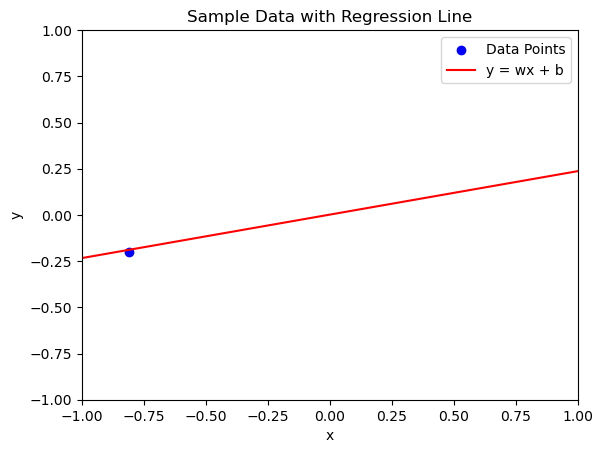

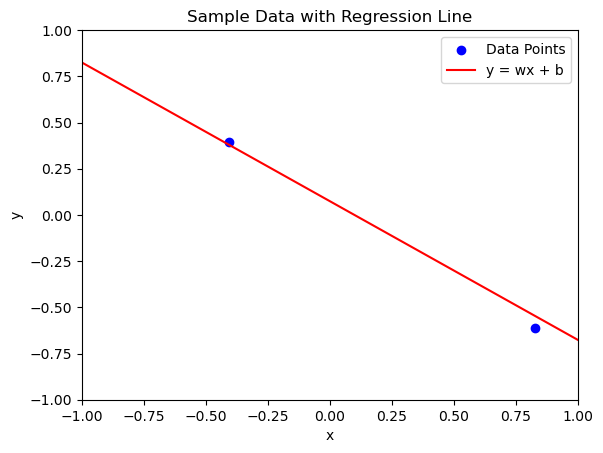

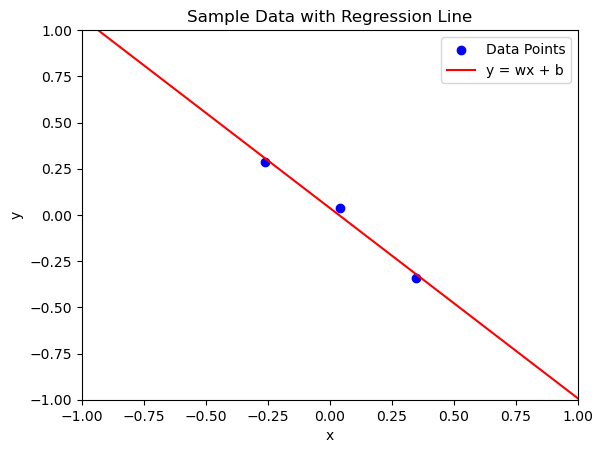

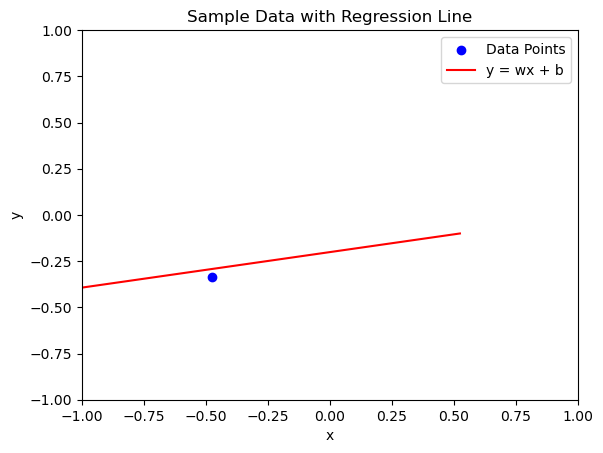

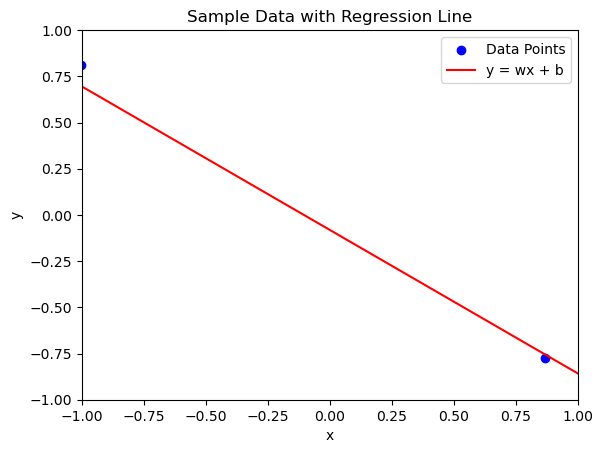

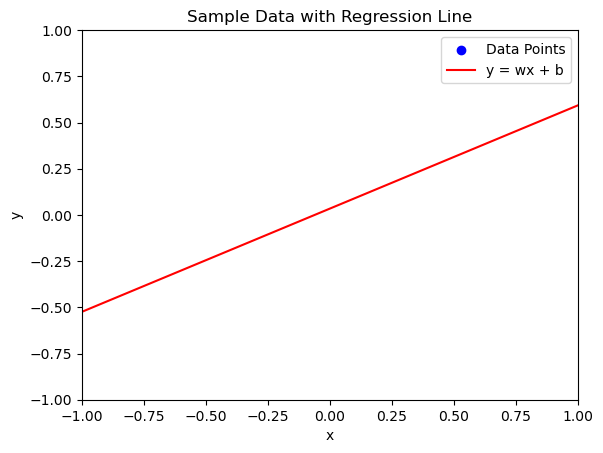

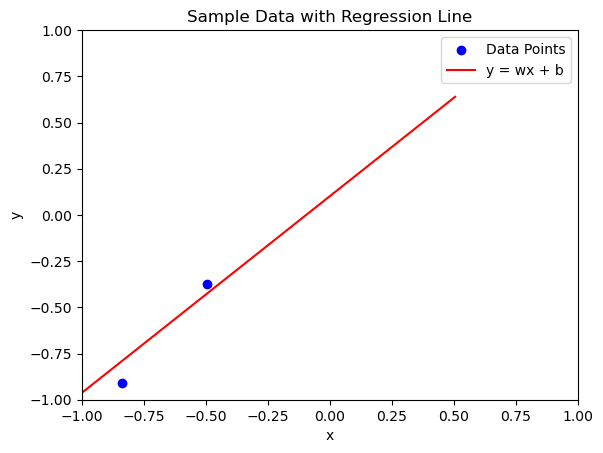

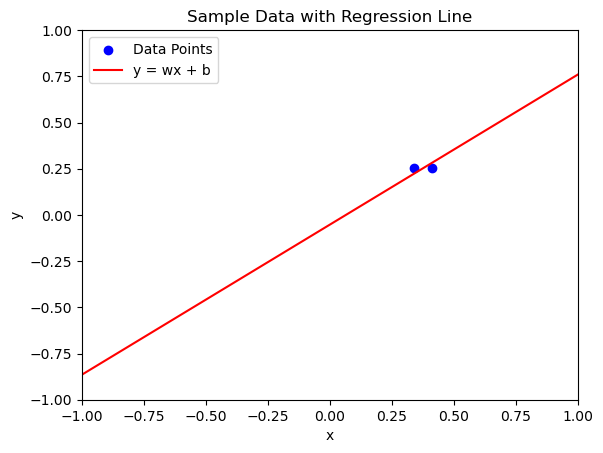

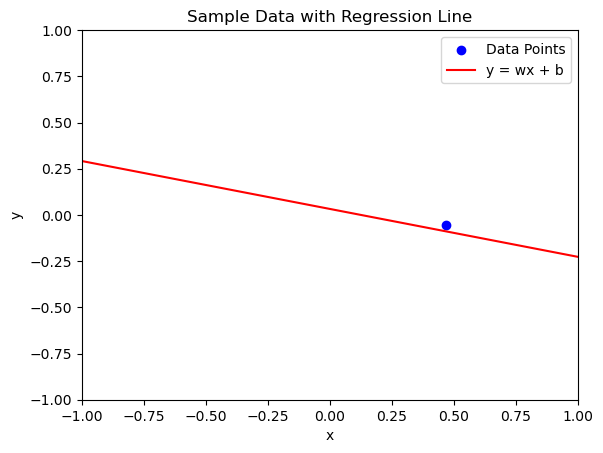

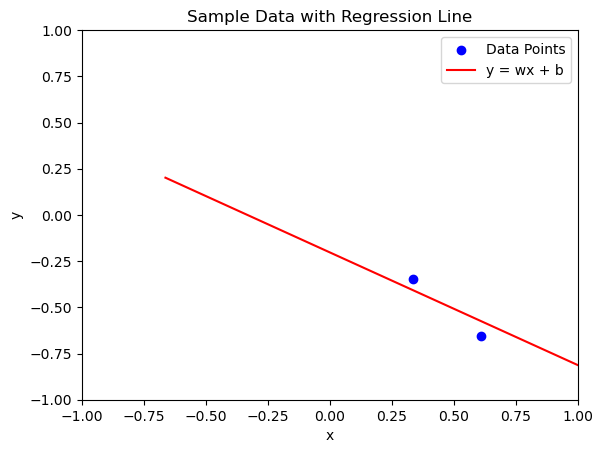

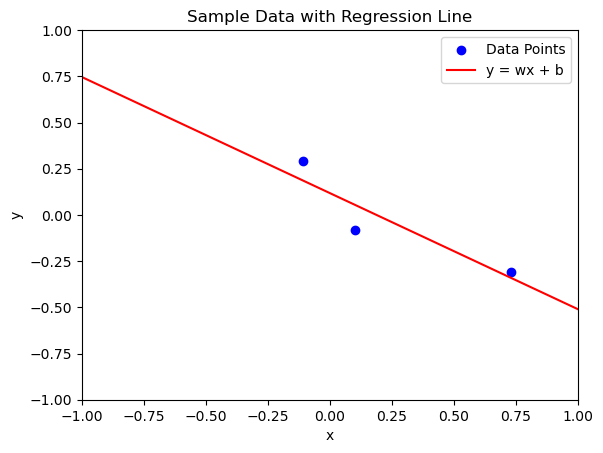

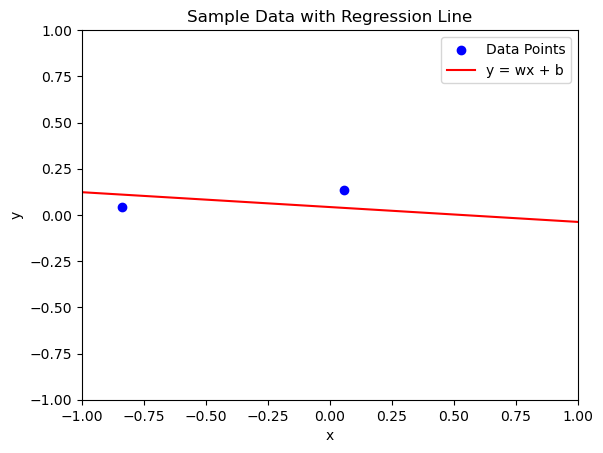

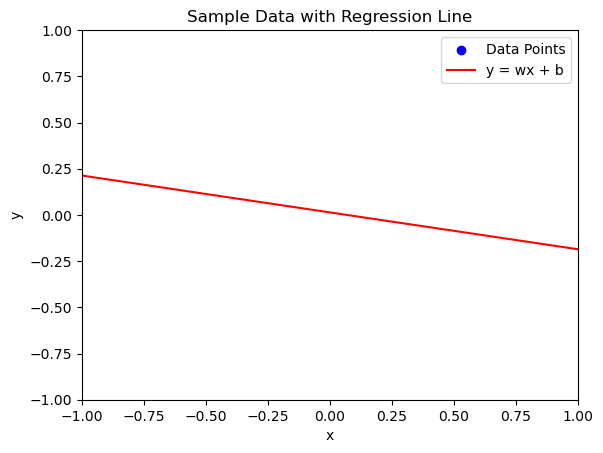

In [9]:
#plot the data points and the regression line
for trial in range(trials):
    fig, ax = plt.subplots()
    ax.scatter(x[:,trial], y[:,trial], label='Data Points', color='blue')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Sample Data with Regression Line")
    x_line = np.linspace(min(x[:,trial])-1, max(x[:,trial])+1, 100)
    y_line = slopes[trial] * x_line + intercepts[trial]
    ax.plot(x_line, y_line, color='red', label='y = wx + b')
    ax.legend()
    ax.set_ylim(bottom=-1, top=1)  # Set y-axis limit to start from 0
    ax.set_xlim(left=-1, right=1)  # Set x-axis limit to start from 0

    fig.show()